In [4]:
import numpy as np
import os
import matplotlib.pyplot as plt

['00003.jpg']
['00003.jpg', '00096.jpg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg', 'images.jpeg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg', 'images.jpeg', 'images.jpg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg', 'images.jpeg', 'images.jpg', 'road3.jpg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg', 'images.jpeg', 'images.jpg', 'road3.jpg', 'road6.jpeg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg', 'images.jpeg', 'images.jpg', 'road3.jpg', 'road6.jpeg', 'solidWhiteCurve.jpg']
['00003.jpg', '00096.jpg', 'climbing-lane.jpg', 'HOW-TO-CHANGE-LANES-DRIVING-scaled.jpg', 'images.jpeg', 'images.jpg', 'road3.jpg', 'road6.jpeg', 'sol

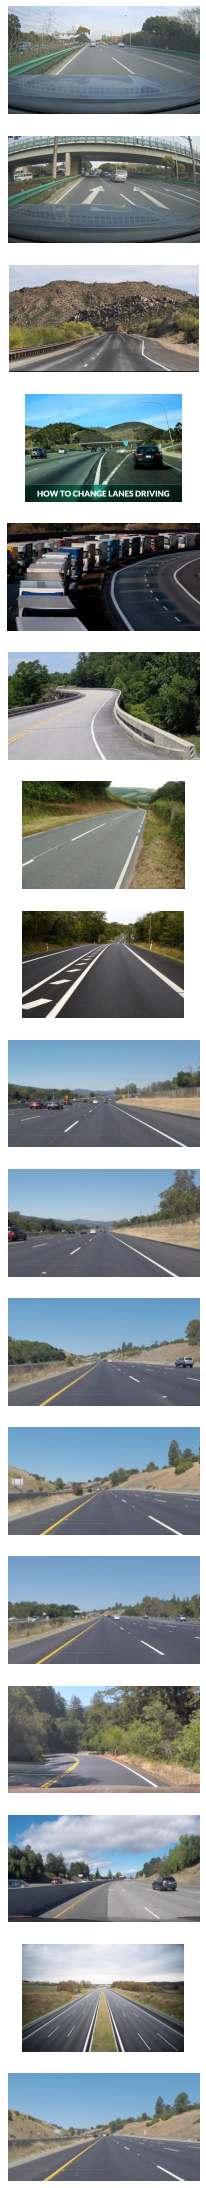

In [15]:
test_images = []
test_titles = []
for filename in os.listdir('./test_images'):
    if "jpg" in filename or "jpeg" in filename:
        test_images.append(plt.imread('./test_images/'+filename))
        test_titles.append(filename)
        print(test_titles)
number_of_images = len(test_images)
fig, axs = plt.subplots(number_of_images, 1)
fig.set_figwidth(40)
fig.set_figheight(40)
for idx, ax in enumerate(axs):
    ax.imshow(test_images[idx])
    ax.axis(False)

In [1]:
import math
def rgb_to_hsi(rgb_pixel):
    red, green, blue = rgb_pixel/256.0
    intensity = min(red, green, blue)
    saturation = 1 - (3*min(red, green, blue)/(red+green+blue + 0.0001))
    denominator = np.sqrt(((red-green)**2 + (red-blue)*(green-blue)))
    denominator = 1 if denominator == 0 else denominator
    theta = math.acos((0.5*(2*red - green- blue))/ denominator)
    hue = theta if blue <= green else 2*math.pi - theta
    return [hue, saturation, intensity]

In [5]:
fig, axs = plt.subplots(number_of_images, 4)
fig.set_figheight(50)
fig.set_figwidth(50)
hsi_images = []
for img, ax in zip(test_images, axs):
    ax[0].imshow(img)
    ax[0].set_title("original image")
    hsi_img = np.apply_along_axis(rgb_to_hsi, -1, img)
    hsi_images.append(hsi_img)
    titles = ['hue', 'saturation', 'intensity']
    for i in range(1,4):
        ax[i].imshow(hsi_img[:,:,i-1], cmap='gray')
        ax[i].set_title(titles[i-1])


NameError: name 'number_of_images' is not defined

In [6]:
img = hsi_images[-1]
hue = img[:, :, 0]
sat = img[:, :, 1]
intensity = img[:,:,2]

white_lane_mask = np.bitwise_and((sat < white_color_saturation_threshold), (intensity > white_color_intensity_theshold))
yellow_lane_mask = np.bitwise_and((sat > yellow_color_saturation_threshold), (hue < yellow_color_hue_threshold))
mask = np.bitwise_or(white_lane_mask, yellow_lane_mask)
copied = np.copy(img)
copied[mask] = 1.
copied[~mask] = 0.

plt.imshow(copied, cmap='gray')


NameError: name 'hsi_images' is not defined

In [3]:
import cv2
from skimage.io import imsave, imread
"""
White Lane Lines:
        higher values in intensity channel and low values in saturation channel
Yellow Lane Lines:
        higher values in saturation channel and low values in hue channel
"""

white_color_intensity_theshold = .75
# white_color_saturation_threshold = .05
white_color_saturation_threshold = .07

yellow_color_saturation_threshold = .2
yellow_color_hue_threshold = 2
fig, axs = plt.subplots(number_of_images, 2)
fig.set_figheight(50)
fig.set_figwidth(50)
count = 0
for idx, ax in enumerate(axs):
    #hsi = np.apply_along_axis(rgb_to_hsi, -1, img)
    img = hsi_images[idx]
    hue = img[:, :, 0]
    sat = img[:, :, 1]
    intensity = img[:,:,2]
    count = count + 1
    white_lane_mask = np.bitwise_and((sat < white_color_saturation_threshold), (intensity > white_color_intensity_theshold))
    yellow_lane_mask = np.bitwise_and((sat > yellow_color_saturation_threshold), (hue < yellow_color_hue_threshold))
    mask = np.bitwise_or(white_lane_mask, yellow_lane_mask)
    mask_img = np.where(mask == True ,1,0)
    imsave(test_titles[idx],mask_img)
    copied = np.copy(img)
    copied[mask] = 1.
    copied[~mask] = 0.
    ax[0].imshow(test_images[idx])
    ax[1].imshow(copied, cmap='gray')
    



NameError: name 'plt' is not defined

In [41]:
print(mask)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [42]:
### White lane markings thesholding 
lower_hue_threshold = 0.
upper_hue_threshold = 3.#.0005

intensity_theshold = .85
### Yellow lane markings thresholding
lower_sat_threshold = .8
upper_sat_threshold = 1.


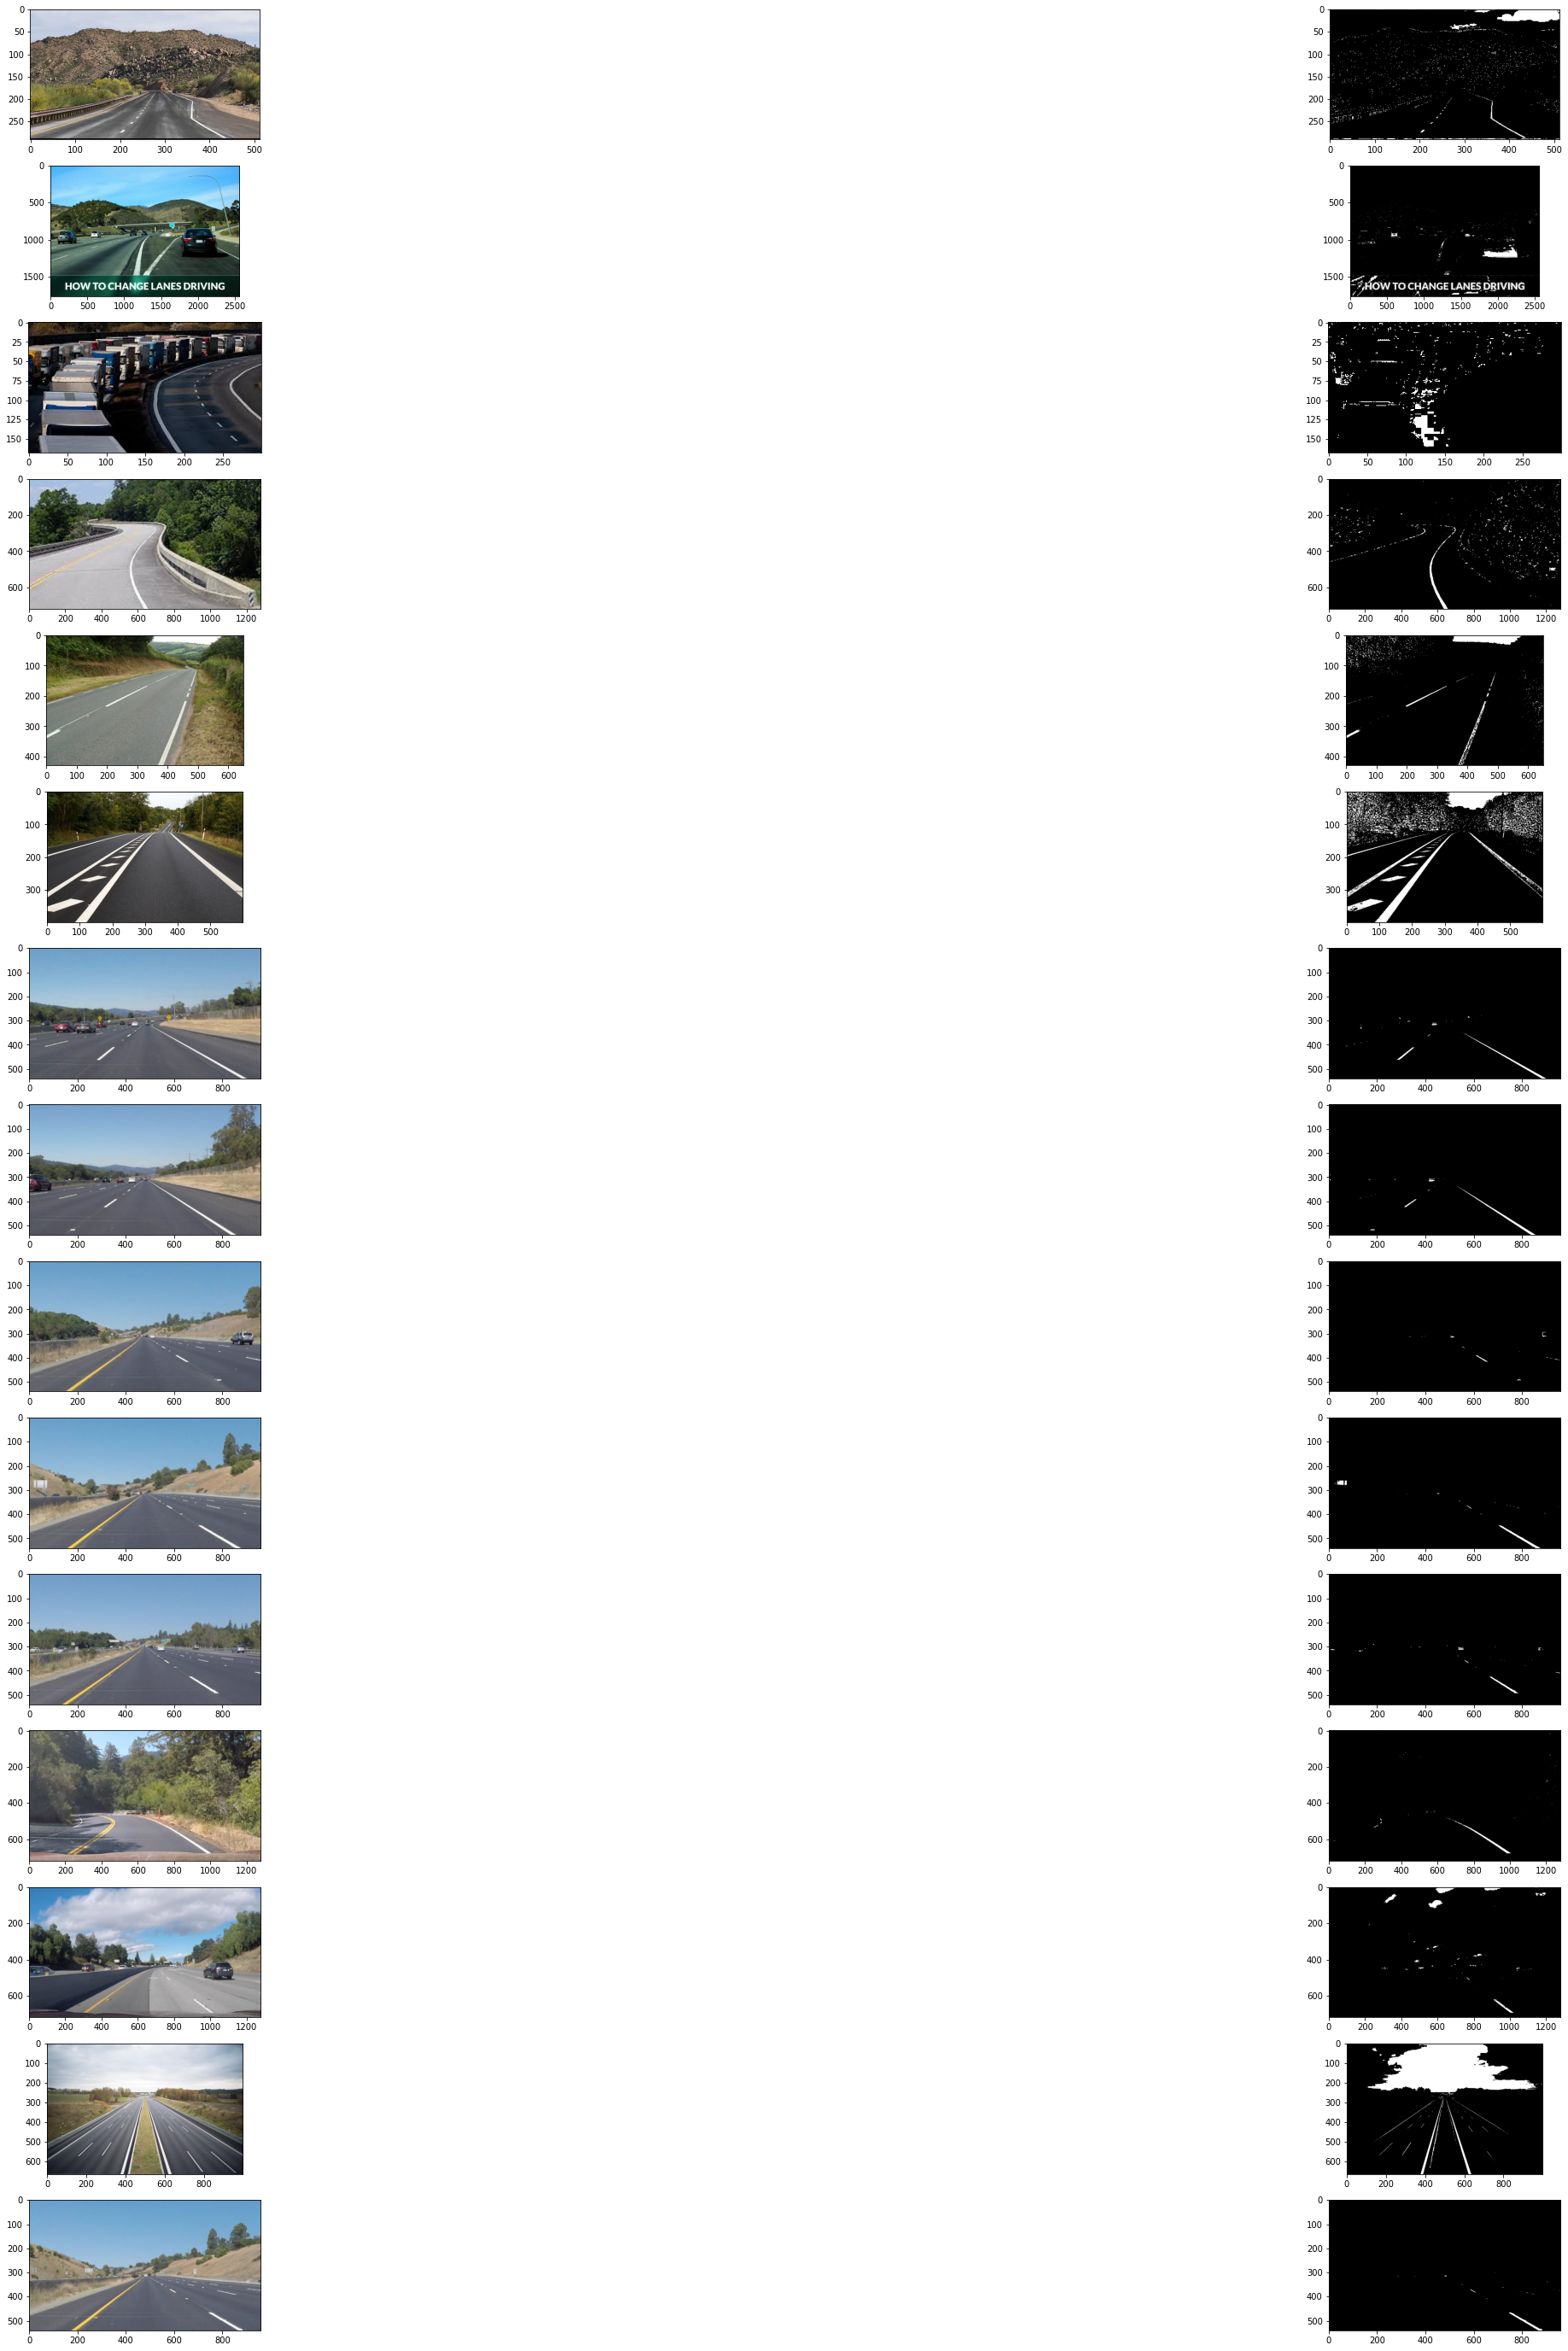

In [43]:
fig, axs = plt.subplots(number_of_images, 2)
fig.set_figheight(50)
fig.set_figwidth(50)

for idx, ax in enumerate(axs):
    #hsi = np.apply_along_axis(rgb_to_hsi, -1, img)
    img = hsi_images[idx]
    hue = img[:, :, 0]
    sat = img[:, :, 1]
    intensity = img[:,:,2]
    white_lane_mask = np.bitwise_and((sat < upper_sat_threshold), (intensity > intensity_theshold))
    yellow_lane_mask = np.bitwise_and((sat > lower_sat_threshold), np.bitwise_and(hue > lower_hue_threshold, hue < upper_hue_threshold))

    mask = np.bitwise_or(white_lane_mask, yellow_lane_mask)
    copied = np.copy(img)
    copied[mask] = 1.
    copied[~mask] = 0.
    ax[0].imshow(test_images[idx])
    ax[1].imshow(copied, cmap='gray')
    

